# KODEX은행지수 예측 모델

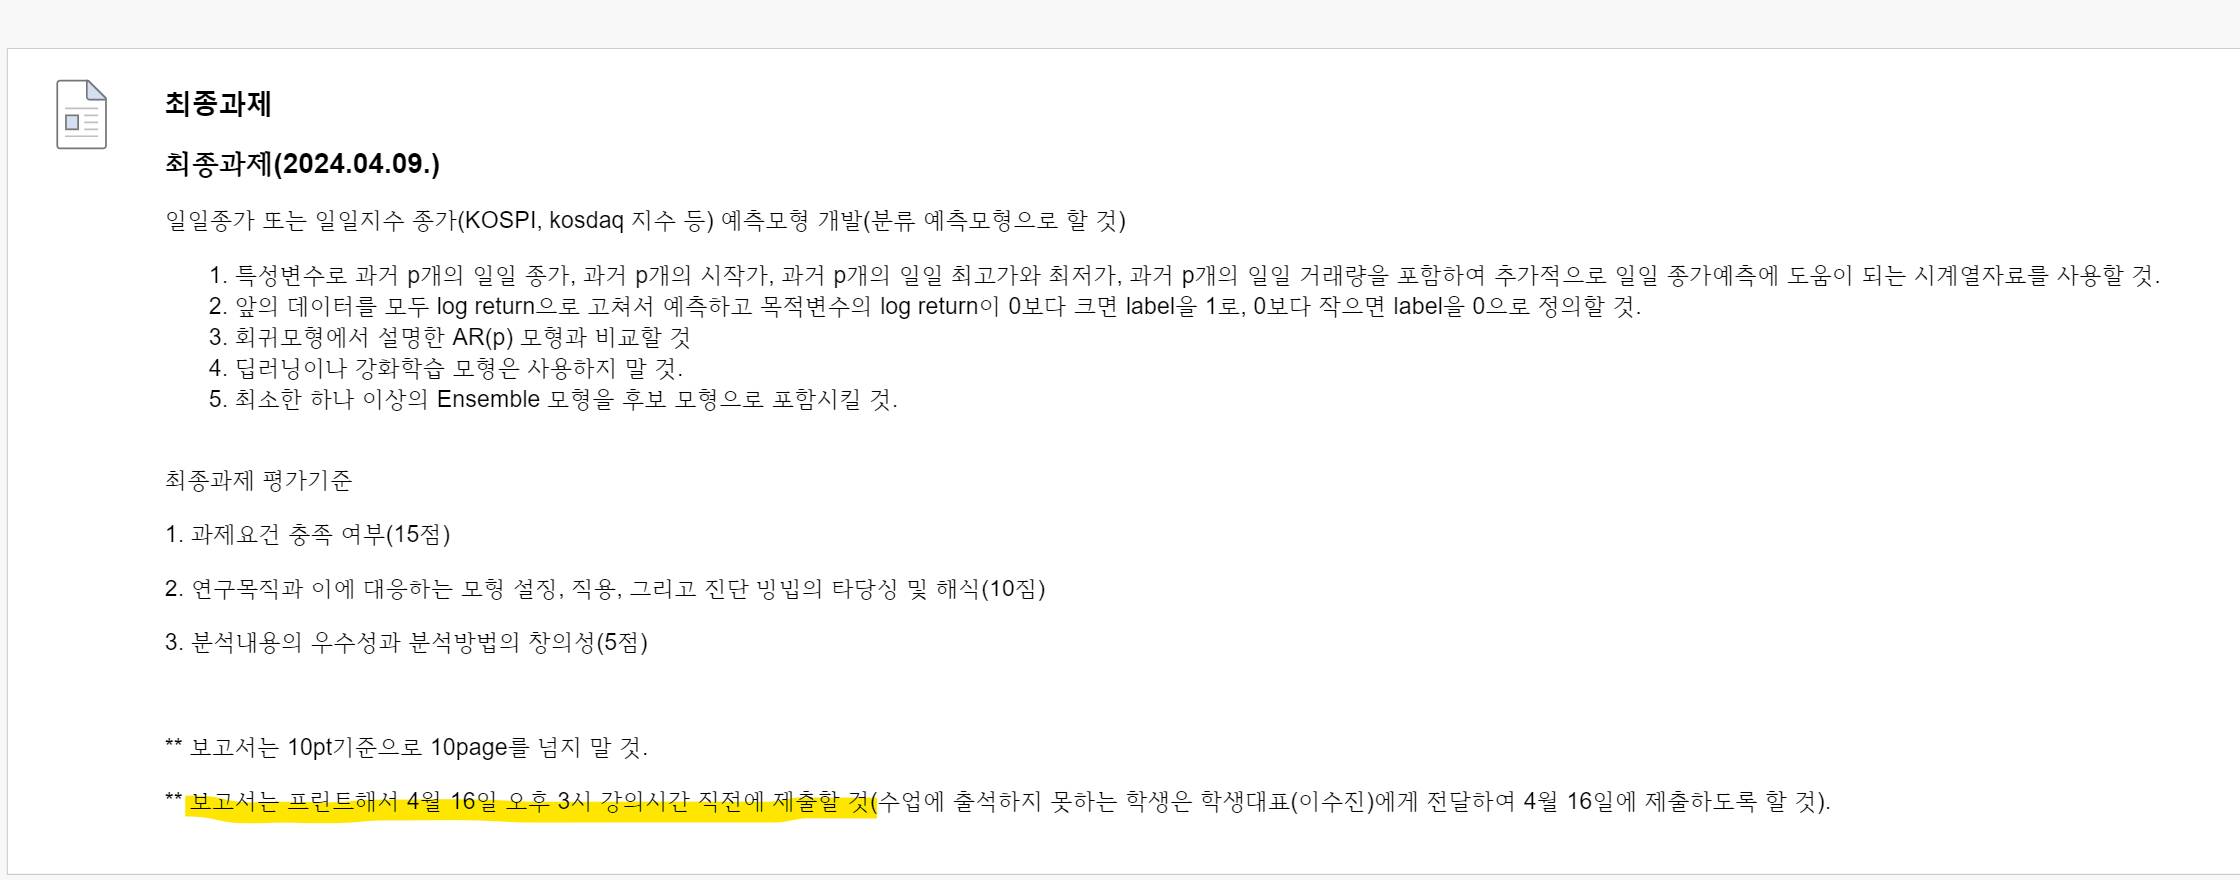

내가 이해한거는 목적변수 (종가든 시작가든 상관없댔음)를 전날 대비 올랐는지 log return(즉 수익률) 파생변수를 하나만들고, 이거가 전날보다 올랐으면 (0보다크면)1 이고, 전날보다 내려갔으면(0보다작으면) 0 으로 레이블링하라는 거같오 ,근데 전날에 데이터가 없다면 그전전날 데이터로 끌어오는 코드도 고려해라 요런식..

# KODEX 은행 데이터 불러오기

In [57]:
!pip install pykrx

  Obtaining dependency information for pykrx from https://files.pythonhosted.org/packages/1e/5a/ffc6741ce31570a968c0c757dc3ff28e0a89f3fbc8d09b4c444a98226c21/pykrx-1.0.45-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/62.4 kB ? eta -:--:--
     ------------------------ ------------- 41.0/62.4 kB 667.8 kB/s eta 0:00:01
     -------------------------------------- 62.4/62.4 kB 840.5 kB/s eta 0:00:00
  Obtaining dependency information for datetime from https://files.pythonhosted.org/packages/f3/78/8e382b8cb4346119e2e04270b6eb4a01c5ee70b47a8a0244ecdb157204f7/DateTime-5.5-py3-none-any.whl.metadata
  Obtaining dependency information for deprecated from https://files.pythonhosted.org/packages/20/8d/778b7d51b981a96554f29136cd59ca7880bf58094338085bcf2a979a0e6a/Deprecated-1.2.14-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------- -------------------------------- 0.4/2.2 MB 8.7 MB/s eta 0:00:01
   ---------------

In [58]:
from pykrx import stock
from pykrx import bond

In [59]:
from pykrx import stock
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd

tickers = stock.get_etf_ticker_list("20201119")
tickers=pd.DataFrame(tickers,columns=['종목코드'])

url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df = json_normalize(json_data['result']['etfItemList'])
df=df[['itemcode','itemname']]
df=df.rename(columns={"itemcode": "종목코드", "itemname": "종목명"})

etf=pd.merge(left=tickers,right=df,how='left',on='종목코드' )
bank_etf=etf[etf['종목명'].str.contains('은행')][1:]

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_17472\2617184986.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(json_data['result']['etfItemList'])


In [60]:
bank_etf

,종목코드,종목명
272,091170,KODEX 은행


In [62]:
# df = stock.get_market_ohlcv("20140101", "20220810", "091170")
df = stock.get_etf_ohlcv_by_date("20140101", "20240412", '091170')
print(df.head(3))

                NAV    시가    고가    저가    종가     거래량        거래대금    기초지수
날짜                                                                     
2014-01-02  8486.64  8595  8680  8410  8490  118777  1014985790  849.67
2014-01-03  8225.64  8425  8435  8220  8235   16046   132756530  823.30
2014-01-06  8239.39  8255  8325  8160  8235    5639    46433115  824.71


In [63]:
df.tail() # KODEX 데이터



,NAV,시가,고가,저가,종가,거래량,거래대금,기초지수
날짜,,,,,,,,
2024-04-05,7982.42,7950,8075,7935,7985,393780,3159634290,777.91
2024-04-08,8064.02,8000,8130,7980,8055,748528,6039808695,786.36
2024-04-09,7996.32,8085,8140,7985,8030,423717,3406776395,779.38
2024-04-11,7935.16,7635,7985,7625,7920,1055072,8268238985,773.08
2024-04-12,7674.79,7870,7905,7640,7660,1138940,8777506815,746.18


In [ ]:
df_ = (df['Close']/df['Close'].shift(1)-1)*100 #위 수식 코드로 구현

df_.tail() #전날 대비 수익률

In [ ]:
df[]

### 이거는 fdr로 불러올때...

In [36]:
df_index_list = fdr.SnapDataReader('KRX/INDEX/LIST') # KRX 전체 지수목록
df_index_list

,Code,Name,Market
0,1001,코스피,KOSPI
1,1002,코스피 대형주,KOSPI
2,1003,코스피 중형주,KOSPI
3,1004,코스피 소형주,KOSPI
4,1005,음식료품,KOSPI
...,...,...,...
153,5445,KRX FactSet 차세대 에너지 지수,테마
154,5505,KRX 포스트 IPO 지수,테마
155,5600,KTOP 30,KRX
156,G004,KRX/S&P 탄소효율 그린뉴딜지수,테마


In [4]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2006-06-27,5969,6072,5969,6032,1392684,NaN
2006-06-28,5951,5954,5928,5950,555069,-0.013594
2006-06-29,5999,6147,5999,6147,504547,0.033109
2006-06-30,6571,6571,6241,6323,483252,0.028632
2006-07-03,6331,6336,6241,6343,424259,0.003163
...,...,...,...,...,...,...
2024-04-05,7950,8075,7935,7985,393780,-0.009305
2024-04-08,8000,8130,7980,8055,748528,0.008766
2024-04-09,8085,8140,7985,8030,423717,-0.003104


# 데이터 시각화

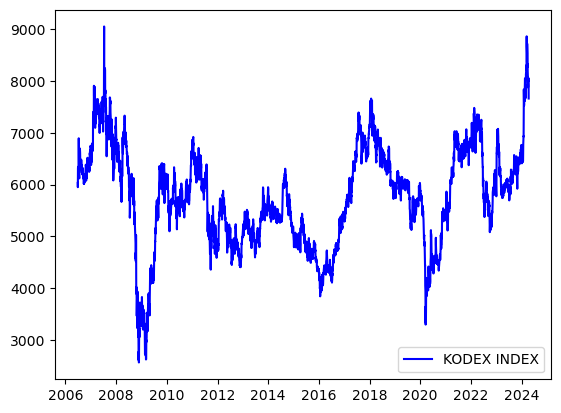

In [5]:

import matplotlib.pyplot as plt
plt.plot(df.index,df.Close,'b',label='KODEX INDEX')
plt.legend(loc='best')
plt.show()

# 코픽스 변수데이터 불러오기

In [33]:
import requests
year = 2014
url = f'https://portal.kfb.or.kr/fingoods/cofix.php?BasicYear_W={year}&BasicYear={year}'
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    'Host': 'portal.kfb.or.kr',
    'Referer': 'https://portal.kfb.or.kr/fingoods/cofix.php?BasicYear_W=&BasicYear=2022',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Whale/3.21.192.22 Safari/537.36',
}
res = requests.get(url, headers=headers)
res.encoding = 'euc-kr'
res.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ko" lang="ko">\r\n<head>\r\n<title>전국은행연합회 소비자포털</title>\r\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n<meta http-equiv="imagetoolbar" content="no" />\r\n<meta name="viewport" content="width=1200" />\r\n<meta name="apple-mobile-web-app-title" content="전국은행연합회 소비자포털" />\r\n<meta name="robots" content="index,follow"/>\r\n<!-- <meta name="naver-site-verification" content="61315e811a24bc961d6d9b08f8032dcdeb0df528" /> -->\r\n<meta name="description" content="금융상품정보, 금리/수수료 비교공시, 금융서비스정보, 소비자정보, 금융교육, 보이스피싱정보"/>\r\n<meta property="og:title" content="전국은행연합회 소비자포털" />\r\n<meta property="og:url" content="https://portal.kfb.or.kr" />\r\n<meta property="og:image" content="https://portal.kfb.or.kr/images/kfb_icon.png" />\r\n<meta pr

In [24]:
import pandas as pd
dfs = pd.read_html(res.text)
dfs

[           공시일      대상월  신규취급액기준 COFIX  잔액기준 COFIX  신 잔액기준 COFIX
 0   2013/12/16  2013/11           2.60        2.91           NaN
 1   2013/11/15  2013/10           2.62        2.94           NaN
 2   2013/10/15  2013/09           2.63        2.99           NaN
 3   2013/09/16  2013/08           2.62        3.02           NaN
 4   2013/08/16  2013/07           2.63        3.06           NaN
 5   2013/07/15  2013/06           2.65        3.11           NaN
 6   2013/06/17  2013/05           2.66        3.17           NaN
 7   2013/05/15  2013/04           2.74        3.24           NaN
 8   2013/04/15  2013/03           2.85        3.32           NaN
 9   2013/03/15  2013/02           2.93        3.38           NaN
 10  2013/02/15  2013/01           2.99        3.45           NaN
 11  2013/01/15  2012/12           3.09        3.52           NaN,
            공시일                     대상기간  단기 COFIX
 0   2013/12/26  2013/12/14 ~ 2013/12/20      2.46
 1   2013/12/18  2013/12/07 ~ 2013/12/1

In [20]:
import requests
import pandas as pd

def get_cofix_tables(year):
    url = f'https://portal.kfb.or.kr/fingoods/cofix.php?BasicYear_W={year}&BasicYear={year}'
    headers = {
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
        'Host': 'portal.kfb.or.kr',
        'Referer': 'https://portal.kfb.or.kr/fingoods/cofix.php?BasicYear_W=&BasicYear=2022',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Whale/3.21.192.22 Safari/537.36',
    }
    res = requests.get(url, headers=headers)
    res.encoding = 'euc-kr'
    return pd.read_html(res.text)

df_cofix = pd.DataFrame()
df_cofix_short = pd.DataFrame()

for year in range(2013, 2024):
    dfs = get_cofix_tables(year)
    df_cofix = pd.concat([df_cofix, dfs[0]])
    df_cofix_short = pd.concat([df_cofix_short, dfs[1]])

In [9]:
df_cofix

,공시일,대상월,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
0,2013/12/16,2013/11,2.60,2.91,NaN
1,2013/11/15,2013/10,2.62,2.94,NaN
2,2013/10/15,2013/09,2.63,2.99,NaN
3,2013/09/16,2013/08,2.62,3.02,NaN
4,2013/08/16,2013/07,2.63,3.06,NaN
...,...,...,...,...,...
7,2023/05/15,2023/04,3.44,3.73,3.09
8,2023/04/17,2023/03,3.56,3.71,3.08
9,2023/03/15,2023/02,3.53,3.67,3.07
10,2023/02/15,2023/01,3.82,3.63,3.02


In [30]:
df2 = df_cofix[['공시일','신규취급액기준 COFIX']]
df2

,공시일,신규취급액기준 COFIX
0,2013/12/16,2.60
1,2013/11/15,2.62
2,2013/10/15,2.63
3,2013/09/16,2.62
4,2013/08/16,2.63
...,...,...
7,2023/05/15,3.44
8,2023/04/17,3.56
9,2023/03/15,3.53
10,2023/02/15,3.82


In [31]:
df2['공시일'] = pd.to_datetime(df2['공시일'])

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_17472\3613509407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['공시일'] = pd.to_datetime(df2['공시일'])


## COFIX 변수

In [32]:
df2 #to_datetime으로 변경

,공시일,신규취급액기준 COFIX
0,2013-12-16,2.60
1,2013-11-15,2.62
2,2013-10-15,2.63
3,2013-09-16,2.62
4,2013-08-16,2.63
...,...,...
7,2023-05-15,3.44
8,2023-04-17,3.56
9,2023-03-15,3.53
10,2023-02-15,3.82


In [39]:
df2['COFIX'] = df2['신규취급액기준 COFIX'] 
df2

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_17472\3481842670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['COFIX'] = df2['신규취급액기준 COFIX']


,공시일,신규취급액기준 COFIX,COFIX
0,2013-12-16,2.60,2.60
1,2013-11-15,2.62,2.62
2,2013-10-15,2.63,2.63
3,2013-09-16,2.62,2.62
4,2013-08-16,2.63,2.63
...,...,...,...
7,2023-05-15,3.44,3.44
8,2023-04-17,3.56,3.56
9,2023-03-15,3.53,3.53
10,2023-02-15,3.82,3.82


In [40]:
# Create a new DataFrame based on df1
df1_new = df.copy()
df1_new['COFIX'] = None  # Initialize the COFIX column

# Function to find the COFIX value for each date in df1
def find_cofix(date, df2):
    # Reverse iteration to find the first applicable COFIX value before the date
    for idx in range(len(df2) - 1, -1, -1):
        if df2.iloc[idx]['공시일'] <= date:
            return df2.iloc[idx]['COFIX']
    return None

# Applying the function to populate the COFIX column in df1_new
df1_new['COFIX'] = df1_new.index.map(lambda x: find_cofix(x, df2))

df1_new

,Open,High,Low,Close,Volume,Change,COFIX
Date,,,,,,,
2014-01-02,5982,6044,5855,5915,170493,-0.005715,3.09
2014-01-03,5864,5873,5722,5737,23033,-0.030093,3.09
2014-01-06,5747,5797,5681,5737,8093,0.000000,3.09
2014-01-07,5708,5750,5681,5686,16600,-0.008890,3.09
2014-01-08,5702,5750,5664,5709,10256,0.004045,3.09
...,...,...,...,...,...,...,...
2024-04-05,7950,8075,7935,7985,393780,-0.009305,4.29
2024-04-08,8000,8130,7980,8055,748528,0.008766,4.29
2024-04-09,8085,8140,7985,8030,423717,-0.003104,4.29


In [43]:
# Renaming the 'Change' column to 'log_return' 
# 로그 리턴 값으로 변경
df1_new.rename(columns={'Change': 'log_return'}, inplace=True)
df1_new

,Open,High,Low,Close,Volume,log_return,COFIX
Date,,,,,,,
2014-01-02,5982,6044,5855,5915,170493,-0.005715,3.09
2014-01-03,5864,5873,5722,5737,23033,-0.030093,3.09
2014-01-06,5747,5797,5681,5737,8093,0.000000,3.09
2014-01-07,5708,5750,5681,5686,16600,-0.008890,3.09
2014-01-08,5702,5750,5664,5709,10256,0.004045,3.09
...,...,...,...,...,...,...,...
2024-04-05,7950,8075,7935,7985,393780,-0.009305,4.29
2024-04-08,8000,8130,7980,8055,748528,0.008766,4.29
2024-04-09,8085,8140,7985,8030,423717,-0.003104,4.29


In [47]:
# Load the Excel file
df_change = pd.read_excel('C:/Users/chanyoung/Downloads/주요국 통화의 대원화 환율.xlsx')
df_change

,주요국 통화의 대원화 환율,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,주석,"1) 원/달러, 원/위안은 서울외국환시장 은행간 거래의 종가 기준2) 원/엔(하나은...",NaN,NaN
1,출처,ECOS,NaN,NaN
2,범례명,원/달러(좌축),원/100엔(좌축),원/위안(우축)
3,단위,(원),(원),(원)
4,주기,일,일,일
...,...,...,...,...
8439,2024-04-05,1352.8,894.5,186.7
8440,2024-04-08,1353.2,891.29,186.81
8441,2024-04-09,1354.9,892.06,187.06
8442,2024-04-11,1364.1,891.13,188.04


In [48]:
df_change.head(10)

,주요국 통화의 대원화 환율,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,주석,"1) 원/달러, 원/위안은 서울외국환시장 은행간 거래의 종가 기준2) 원/엔(하나은...",NaN,NaN
1,출처,ECOS,NaN,NaN
2,범례명,원/달러(좌축),원/100엔(좌축),원/위안(우축)
3,단위,(원),(원),(원)
4,주기,일,일,일
5,기간,1990-03-02 ~ 2024-04-12,2005-03-02 ~ 2024-04-12,2014-12-01 ~ 2024-04-12
6,1990-03-02,693,NaN,NaN
7,1990-03-05,695.1,NaN,NaN
8,1990-03-06,696.4,NaN,NaN
9,1990-03-07,697.6,NaN,NaN


In [51]:
df_change= df_change[6:]
df_change

,주요국 통화의 대원화 환율,Unnamed: 1,Unnamed: 2,Unnamed: 3
6,1990-03-02,693,NaN,NaN
7,1990-03-05,695.1,NaN,NaN
8,1990-03-06,696.4,NaN,NaN
9,1990-03-07,697.6,NaN,NaN
10,1990-03-08,698.1,NaN,NaN
...,...,...,...,...
8439,2024-04-05,1352.8,894.5,186.7
8440,2024-04-08,1353.2,891.29,186.81
8441,2024-04-09,1354.9,892.06,187.06
8442,2024-04-11,1364.1,891.13,188.04


In [52]:
df_change.rename(columns={'주요국 통화의 대원화 환율': 'Date'}, inplace=True)

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_17472\3889438914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change.rename(columns={'주요국 통화의 대원화 환율': 'Date'}, inplace=True)


In [53]:
df_change.rename(columns={'Unnamed: 1': 'change'}, inplace=True)
df_change

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_17472\1937418377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change.rename(columns={'Unnamed: 1': 'change'}, inplace=True)


,Date,change,Unnamed: 2,Unnamed: 3
6,1990-03-02,693,NaN,NaN
7,1990-03-05,695.1,NaN,NaN
8,1990-03-06,696.4,NaN,NaN
9,1990-03-07,697.6,NaN,NaN
10,1990-03-08,698.1,NaN,NaN
...,...,...,...,...
8439,2024-04-05,1352.8,894.5,186.7
8440,2024-04-08,1353.2,891.29,186.81
8441,2024-04-09,1354.9,892.06,187.06
8442,2024-04-11,1364.1,891.13,188.04


In [55]:
df_change = df_change[['Date','change']]

In [56]:
df_change.head()

,Date,change
6,1990-03-02,693
7,1990-03-05,695.1
8,1990-03-06,696.4
9,1990-03-07,697.6
10,1990-03-08,698.1


In [ ]:
df1_new.r

Date	change